In [1]:
import pandas as pd
import seaborn as sns
import os, sys

In [2]:

path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
sys.path.insert(0, path_parent+'/notebooks')

In [3]:
df = pd.read_csv('data/AdSmartABdata.csv')

In [5]:
df.nunique()

auction_id     8077
experiment        2
date              8
hour             24
device_make     270
platform_os       3
browser          15
yes               2
no                2
dtype: int64

In [6]:
df.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

In [7]:
df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


/home/owon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='platform_os', ylabel='Density'>

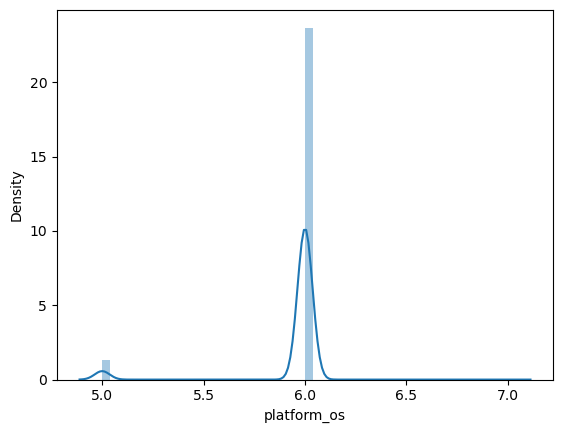

In [8]:
sns.distplot(df['platform_os'])

In [9]:
df.experiment.value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [10]:
df.shape

(8077, 9)

<AxesSubplot:xlabel='experiment', ylabel='platform_os'>

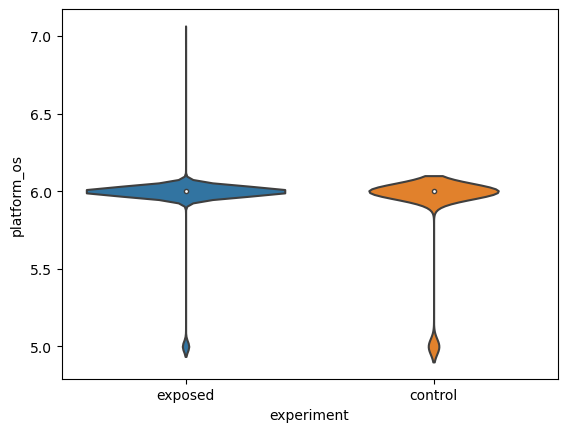

In [11]:
sns.violinplot(x=df['experiment'],y=df['platform_os'])

In [12]:
device_make = df['device_make'].unique()

In [13]:
df['dev_make_mapped'] = df.device_make.astype("category").cat.codes
df['browser_mapped'] = df.browser.astype('category').cat.codes

In [14]:
df.device_make.nunique(),df.dev_make_mapped.nunique()

(270, 270)

<AxesSubplot:xlabel='experiment', ylabel='dev_make_mapped'>

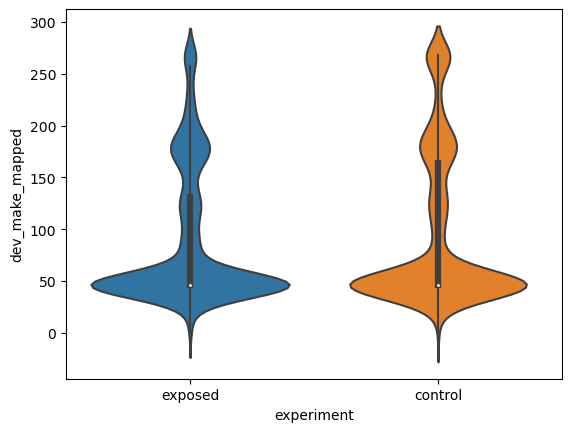

In [15]:
sns.violinplot(y=df['dev_make_mapped'],x=df['experiment'])

<AxesSubplot:xlabel='experiment', ylabel='browser_mapped'>

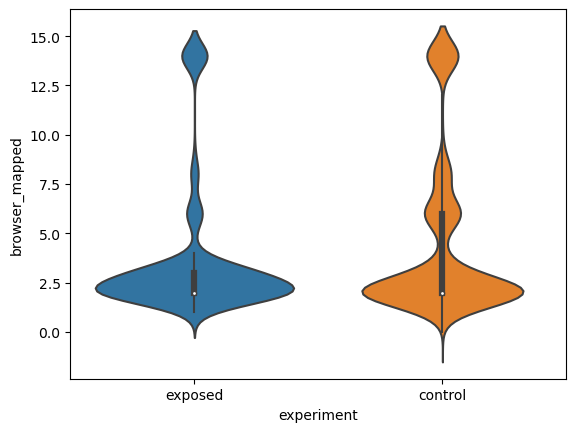

In [16]:
sns.violinplot(y=df['browser_mapped'],x=df['experiment'])

/home/owon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

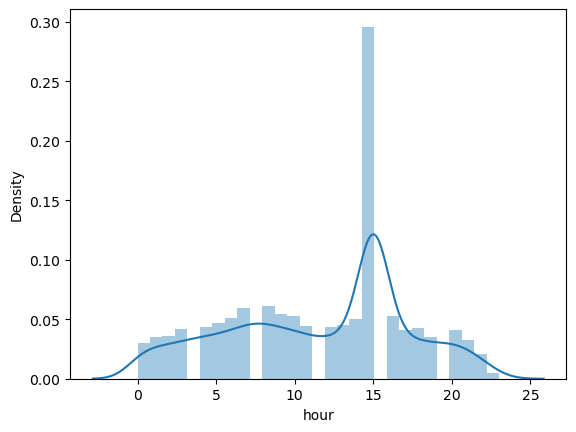

In [17]:
#distribution plot
sns.distplot(df['hour'])

In [39]:
df.auction_id.value_counts().nlargest(5)

0008ef63-77a7-448b-bd1e-075f42c55e39    1
aa14b324-5c46-4b3a-8e75-18d78968495b    1
aa84454c-a749-4c98-bf9f-1f99c04416af    1
aa6ecb40-6a48-4c06-a611-4c9aa9023ea8    1
aa6c6cda-e498-4e8f-b886-1d969bd376ea    1
Name: auction_id, dtype: int64

In [43]:
def explore_categoricals(df):
    for x in df.columns:
        print("\n\nFor Category: "+x+"\n")
        if df[x].dtype == 'object':
            print(df[x].value_counts().nlargest(5))

In [46]:
explore_categoricals(df[['auction_id','experiment',data]])



For Category: auction_id

0008ef63-77a7-448b-bd1e-075f42c55e39    1
aa14b324-5c46-4b3a-8e75-18d78968495b    1
aa84454c-a749-4c98-bf9f-1f99c04416af    1
aa6ecb40-6a48-4c06-a611-4c9aa9023ea8    1
aa6c6cda-e498-4e8f-b886-1d969bd376ea    1
Name: auction_id, dtype: int64


For Category: experiment

control    4071
exposed    4006
Name: experiment, dtype: int64


For Category: date

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
Name: date, dtype: int64


For Category: hour



For Category: device_make

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
Name: device_make, dtype: int64


For Category: platform_os



For Category: browser

Chrome Mobile            4554
Chrome Mobile WebView    1489
Samsung Internet          824
Facebook                  764
Mobile Safari             337
Name: browser, dtype: int64


For Category: yes



For Category: no



For C